In [0]:
!pip install -q keras

In [0]:
!unzip classifiedData.zip -d classifiedData/

Archive:  classifiedData.zip
   creating: classifiedData/classifiedData/
  inflating: classifiedData/classifiedData/.DS_Store  
   creating: classifiedData/__MACOSX/
   creating: classifiedData/__MACOSX/classifiedData/
  inflating: classifiedData/__MACOSX/classifiedData/._.DS_Store  
   creating: classifiedData/classifiedData/training/
   creating: classifiedData/classifiedData/training/contempt/
  inflating: classifiedData/classifiedData/training/contempt/Vojislav_Kostunica_0002.jpg  
   creating: classifiedData/__MACOSX/classifiedData/training/
   creating: classifiedData/__MACOSX/classifiedData/training/contempt/
  inflating: classifiedData/__MACOSX/classifiedData/training/contempt/._Vojislav_Kostunica_0002.jpg  
  inflating: classifiedData/classifiedData/training/contempt/Milan_Kucan_0001.jpg  
  inflating: classifiedData/__MACOSX/classifiedData/training/contempt/._Milan_Kucan_0001.jpg  
  inflating: classifiedData/classifiedData/training/contempt/Tim_Henman_0005.jpg  
  inflating:

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras import backend as K

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = r'./classifiedData/classifiedData/training',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 8216 images belonging to 8 classes.


In [0]:
val_datagen = ImageDataGenerator(
        rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        directory = r'./classifiedData/classifiedData/validation',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_labels = []

for i in range(0,2737//32+1):
    val_labels.extend(np.array(val_generator[i][1]))

Found 2737 images belonging to 8 classes.


In [0]:
test_datagen = ImageDataGenerator(
        rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        directory = r'./classifiedData/classifiedData/testing',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_labels = []

for i in range(0,2736//32+1):
    test_labels.extend(np.array(test_generator[i][1]))

Found 2736 images belonging to 8 classes.


In [0]:
img_width = 224
img_height = 224
epochs = 40

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model_t = Sequential()
model_t.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Conv2D(32, (3, 3)))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Conv2D(64, (3, 3)))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Flatten())
model_t.add(Dense(64))
model_t.add(Activation('relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(8))
model_t.add(Activation('softmax'))

model_t.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H_t = model_t.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
256/256 [==============================] - 35s 135ms/step - loss: 1.1663 - acc: 0.4760 - val_loss: 1.0043 - val_acc: 0.5713
Epoch 2/40
256/256 [==============================] - 31s 122ms/step - loss: 0.9819 - acc: 0.5909 - val_loss: 0.8331 - val_acc: 0.7235
Epoch 3/40
256/256 [==============================] - 31s 122ms/step - loss: 0.8772 - acc: 0.6603 - val_loss: 0.7622 - val_acc: 0.7231
Epoch 4/40
256/256 [==============================] - 31s 122ms/step - loss: 0.7970 - acc: 0.7083 - val_loss: 0.6824 - val_acc: 0.7682
Epoch 5/40
256/256 [==============================] - 31s 122ms/step - loss: 0.7400 - acc: 0.7323 - val_loss: 0.6526 - val_acc: 0.7671
Epoch 6/40
256/256 [==============================] - 31s 123ms/step - loss: 0.6661 - acc:

In [0]:
# make predictions on the validation images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_val = model_t.predict_generator(val_generator,
                                   steps=2737//32 + 1)
predIdxs_val = np.argmax(predIdxs_val, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(val_labels,axis=1), predIdxs_val))

              precision    recall  f1-score   support

           0       0.11      0.02      0.03        50
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00         4
           4       0.42      0.44      0.43      1138
           5       0.50      0.54      0.52      1373
           6       0.04      0.02      0.03        54
           7       0.00      0.00      0.00        73

   micro avg       0.45      0.45      0.45      2737
   macro avg       0.13      0.13      0.13      2737
weighted avg       0.43      0.45      0.44      2737



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# make predictions on the testing images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_test = model_t.predict_generator(test_generator,
                                   steps=2736//32 + 1)
predIdxs_test = np.argmax(predIdxs_test, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(test_labels,axis=1), predIdxs_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00         4
           4       0.40      0.41      0.41      1138
           5       0.49      0.53      0.51      1373
           6       0.00      0.00      0.00        54
           7       0.06      0.01      0.02        73

   micro avg       0.44      0.44      0.44      2736
   macro avg       0.12      0.12      0.12      2736
weighted avg       0.41      0.44      0.43      2736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


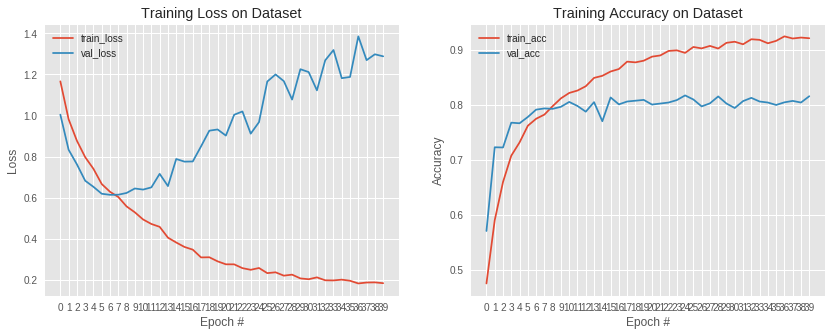

In [0]:
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
plt.plot(np.arange(0, N), H_t.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H_t.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.xticks(np.arange(0, N))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0, N), H_t.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H_t.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, N))
plt.legend()
plt.show()

In [0]:
img_width = 224
img_height = 224
epochs = 1

from keras.optimizers import Adam

adam = Adam(lr=0.01)

model_1 = VGG16(include_top=True, classes=8, weights = None)

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H_1 = model_1.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Epoch 1/1
256/256 [==============================] - 271s 1s/step - loss: 1.1056 - acc: 0.4791 - val_loss: 1.1005 - val_acc: 0.4998


In [0]:
img_width = 224
img_height = 224
epochs = 1

from keras.optimizers import Adam

adam = Adam(lr=0.001)

model_1 = VGG16(include_top=True, classes=8, weights = None)

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H_1 = model_1.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
256/256 [==============================] - 280s 1s/step - loss: 9.2965 - acc: 0.4155 - val_loss: 9.4220 - val_acc: 0.4154


In [0]:
img_width = 224
img_height = 224
epochs = 20

from keras.optimizers import Adam

adam = Adam(lr=0.0001)

model_1 = VGG16(include_top=True, classes=8, weights = None)

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H_1 = model_1.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Epoch 1/20
256/256 [==============================] - 272s 1s/step - loss: 1.0928 - acc: 0.4838 - val_loss: 1.0203 - val_acc: 0.5013
Epoch 2/20
256/256 [==============================] - 265s 1s/step - loss: 1.0451 - acc: 0.4882 - val_loss: 1.0692 - val_acc: 0.4965
Epoch 3/20
256/256 [==============================] - 265s 1s/step - loss: 1.0507 - acc: 0.4954 - val_loss: 1.0307 - val_acc: 0.5094
Epoch 4/20
256/256 [==============================] - 265s 1s/step - loss: 1.0513 - acc: 0.4953 - val_loss: 1.0695 - val_acc: 0.4976
Epoch 5/20
256/256 [==============================] - 265s 1s/step - loss: 1.0454 - acc: 0.4971 - val_loss: 1.0415 - val_acc: 0.5065
Epoch 6/20
256/256 [==============================] - 265s 1s/step - loss: 1.0461 - acc: 0.4914 - val_loss: 1.0470 - val_acc: 0.4902
Epoch 7/20
256/256 [==============================] - 264s 1s/step - loss: 1.0427 - acc: 0.4941 - val_loss: 1.0466 - val_acc: 0.5043
Epoch 8/20
256/256 [==============================] - 265s 1s/step - 

In [0]:
# make predictions on the validation images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_val = model_1.predict_generator(val_generator,
                                   steps=2737//32 + 1)
predIdxs_val = np.argmax(predIdxs_val, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(val_labels,axis=1), predIdxs_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00      1138
           5       0.50      1.00      0.67      1373
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        73

   micro avg       0.50      0.50      0.50      2737
   macro avg       0.06      0.12      0.08      2737
weighted avg       0.25      0.50      0.34      2737



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# make predictions on the testing images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_test = model_1.predict_generator(test_generator,
                                   steps=2736//32 + 1)
predIdxs_test = np.argmax(predIdxs_test, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(test_labels,axis=1), predIdxs_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00      1138
           5       0.50      1.00      0.67      1373
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        73

   micro avg       0.50      0.50      0.50      2736
   macro avg       0.06      0.12      0.08      2736
weighted avg       0.25      0.50      0.34      2736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


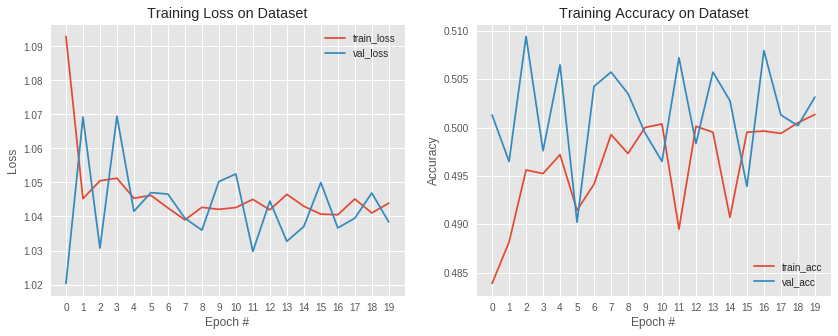

In [0]:
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
plt.plot(np.arange(0, N), H_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H_1.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.xticks(np.arange(0, N))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0, N), H_1.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H_1.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, N))
plt.legend()
plt.show()